##### Copyright 2018 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 텐서플로 2.0 시작하기: 초보자용

이 문서는 [구글 코랩](https://colab.research.google.com/notebooks/welcome.ipynb)(Colaboratory) 노트북 파일입니다. 파이썬 프로그램을 브라우저에서 직접 실행할 수 있기 때문에 텐서플로를 배우고 사용하기 좋은 도구입니다:

1. 파이썬 런타임(runtime)에 연결하세요: 메뉴 막대의 오른쪽 상단에서 *CONNECT*를 선택하세요.
2. 노트북의 모든 코드 셀(cell)을 실행하세요: *Runtime* > *Run all*을 선택하세요.

더 많은 예제와 자세한 안내는 [텐서플로 튜토리얼](https://www.tensorflow.org/tutorials/)을 참고하세요.

먼저 프로그램에 텐서플로 라이브러리를 임포트합니다:

In [46]:
import tensorflow as tf

[MNIST 데이터셋](http://yann.lecun.com/exdb/mnist/)을 로드하여 준비합니다. 샘플 값을 정수에서 부동소수로 변환합니다:

In [47]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [48]:
x_train, x_test = x_train / 255.0, x_test / 255.0

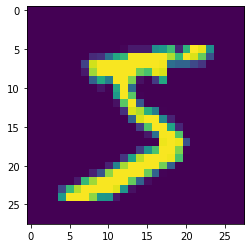

In [49]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.show()


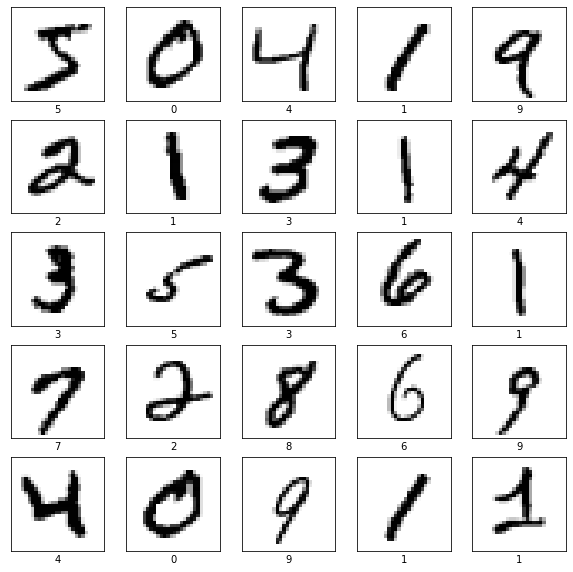

In [50]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

층을 차례대로 쌓아 `tf.keras.Sequential` 모델을 만듭니다. 훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택합니다:

In [51]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28), name = 'input'),
  tf.keras.layers.Dense(128, activation='relu', name = 'hidden'),
  tf.keras.layers.Dense(10, activation='softmax', name = 'output')
])

print(model.summary())
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 128)               100480    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


모델을 훈련하고 평가합니다:

In [71]:
model.fit(x_train, y_train, batch_size = 32, epochs=20, validation_split= 0.1)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1344 - accuracy: 0.9622 - val_loss: 0.1191 - val_accuracy: 0.9682
Epoch 2/20
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1290 - accuracy: 0.9636 - val_loss: 0.1191 - val_accuracy: 0.9678
Epoch 3/20
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1240 - accuracy: 0.9652 - val_loss: 0.1137 - val_accuracy: 0.9697
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1194 - accuracy: 0.9664 - val_loss: 0.1106 - val_accuracy: 0.9698
Epoch 5/20
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1150 - accuracy: 0.9675 - val_loss: 0.1083 - val_accuracy: 0.9688
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1108 - accuracy: 0.9688 - val_loss: 0.1058 - val_accuracy: 0.9705
Epoch 7/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1070 - accuracy: 0.9698 - val_loss: 0.1042 - val_accuracy:

[0.09366316348314285, 0.9714999794960022]

In [72]:
import numpy as np
y_pred = np.fromiter(map(np.argmax, model.predict(x_test)), dtype=np.int)

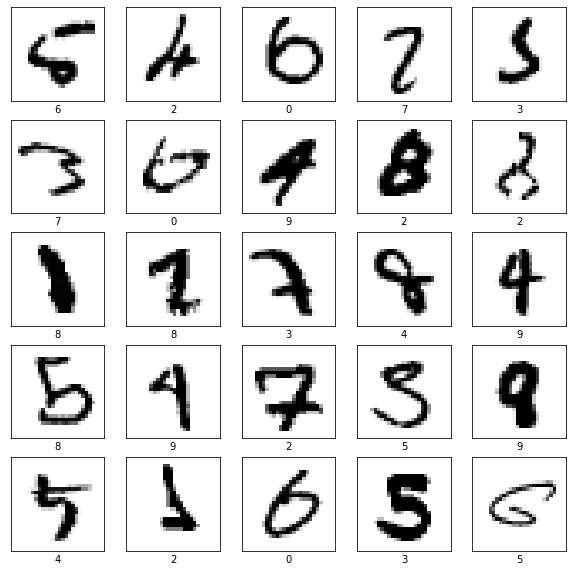

In [73]:
errors = np.where(y_pred!=y_test)[0]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[errors[i]], cmap=plt.cm.binary)
    plt.xlabel(y_pred[errors[i]])
plt.show()